# PROJET 9 : Analysez les ventes d'une librairie avec R ou Python

I- IMPORTATION DES LIBRAIRIES ET DES DONNEES

In [1]:
# import les librairies pandas et numpy
import pandas as pd
import numpy as np

#on importe la librairie seaborn et matplotlib pour le rendu visuel

import seaborn as sns
import matplotlib.pyplot as plt

# Importation datetime

from datetime import datetime
from datetime import date

# pour eviter les messages d'erreurs
import warnings
warnings.filterwarnings(action='ignore')

# test statistique
import statsmodels.api as sm
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

**Vérification des tables**

In [4]:
# Lecture des fichiers
products = pd.read_csv(r"C:\Users\aylin\Downloads\projet 9\products.csv", sep=";")
customers = pd.read_csv(r"C:\Users\aylin\Downloads\projet 9\customers.csv", sep=";")
transactions = pd.read_csv(r"C:\Users\aylin\Downloads\projet 9\transactions.csv",sep=",")

**products**

In [7]:
# Vérification de la table produit
print(products.head(5))

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


In [9]:
products = products.rename(columns={'id_prod':'id_product', 'categ':'category'})

In [11]:
# Vérification des variables de la table produit
print(products.shape)
print(products.describe(include='all'))

(3286, 3)
       id_product        price     category
count        3286  3286.000000  3286.000000
unique       3286          NaN          NaN
top        0_1421          NaN          NaN
freq            1          NaN          NaN
mean          NaN    21.863597     0.370359
std           NaN    29.849786     0.615446
min           NaN     0.620000     0.000000
25%           NaN     6.990000     0.000000
50%           NaN    13.075000     0.000000
75%           NaN    22.990000     1.000000
max           NaN   300.000000     2.000000


L’attribut id_prod constitue bien une clé primaire car toutes ses valeurs sont uniques. En revanche, j’ai remarqué que certains prix sont négatifs.


In [16]:
# On vérifie quels sont les prix négatifs
print(products.sort_values(by='price'))

     id_product   price  category
2271      0_528    0.62         0
2354      0_202    0.62         0
370       0_120    0.66         0
1210     0_1844    0.77         0
1529     0_1620    0.80         0
...         ...     ...       ...
2778       2_30  233.54         2
1435      2_167  236.99         2
394       2_158  247.22         2
724        2_76  254.44         2
946         2_2  300.00         2

[3286 rows x 3 columns]


 le prix négatif correspond au produit 'T_0'

In [19]:
# retire les prix négatifs
products=products[products['id_product'] != 'T_0']
print(products.shape)
print(products.describe(include='all'))

(3286, 3)
       id_product        price     category
count        3286  3286.000000  3286.000000
unique       3286          NaN          NaN
top        0_1421          NaN          NaN
freq            1          NaN          NaN
mean          NaN    21.863597     0.370359
std           NaN    29.849786     0.615446
min           NaN     0.620000     0.000000
25%           NaN     6.990000     0.000000
50%           NaN    13.075000     0.000000
75%           NaN    22.990000     1.000000
max           NaN   300.000000     2.000000


In [21]:
# vérifiée comment est codée la catégorie
print("Les différentes valeurs de la colonne category sont :",products.category.unique())

Les différentes valeurs de la colonne category sont : [0 1 2]


**customers**

In [24]:
# la table client
customers.sample(5)


,client_id,sex,birth
3978,c_6057,m,1986
7748,c_6953,m,1959
5713,c_6644,f,1986
853,c_2926,f,1991
5400,c_200,f,1942


In [26]:
customers['age'] = pd.to_datetime('today').year - customers['birth']
customers['age'] = customers['age'].astype(int)

In [28]:
customers = customers.rename(columns={'birth':'birthday'})

In [30]:
customers['tranche_age'] = pd.cut(customers['age'],bins=[9,19,29,39,49,59,69,79,89,99],
                               labels=['10-19', '20-29', '30-39', '40-49','50-59','60-69','70-79', '80-89', '90-99'])

In [32]:
customers['tranche_age'] = customers['tranche_age'].astype('category')

In [34]:
# Vérification des variables de la table client
print(customers.shape)
print(customers.describe(include='all'))

(8621, 5)
       client_id   sex     birthday          age tranche_age
count       8621  8621  8621.000000  8621.000000        8621
unique      8621     2          NaN          NaN           8
top       c_4410     f          NaN          NaN       40-49
freq           1  4490          NaN          NaN        1730
mean         NaN   NaN  1978.275606    46.724394         NaN
std          NaN   NaN    16.917958    16.917958         NaN
min          NaN   NaN  1929.000000    21.000000         NaN
25%          NaN   NaN  1966.000000    33.000000         NaN
50%          NaN   NaN  1979.000000    46.000000         NaN
75%          NaN   NaN  1992.000000    59.000000         NaN
max          NaN   NaN  2004.000000    96.000000         NaN


L’attribut client_id peut également être considéré comme une clé primaire, car il respecte les mêmes conditions d’unicité.

In [37]:
customers

,client_id,sex,birthday,age,tranche_age
0,c_4410,f,1967,58,50-59
1,c_7839,f,1975,50,50-59
2,c_1699,f,1984,41,40-49
3,c_5961,f,1962,63,60-69
4,c_5320,m,1943,82,80-89
...,...,...,...,...,...
8616,c_7920,m,1956,69,60-69
8617,c_7403,f,1970,55,50-59
8618,c_5119,m,1974,51,50-59
8619,c_5643,f,1968,57,50-59


In [39]:
# Vérification de comment est codé le sexe
print("Les différentes valeurs de la colonne sex sont :",customers.sex.unique())

Les différentes valeurs de la colonne sex sont : ['f' 'm']


**transactions**

retireé les lignes de test

In [43]:
# Vérification de la table vente
print(transactions.head(5))

  id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232


In [45]:
transactions = transactions.rename(columns={'id_prod':'id_product'})

In [47]:
# Suppression des lignes de test
transactions = transactions.drop(transactions.loc[transactions['id_product'] == 'T_0'].index)  # ou 'I_0' si c'est bien le tien

# Conversion de la colonne date
transactions['date'] = pd.to_datetime(
    transactions['date'].astype(str).str.strip().str.replace('T', ' ', regex=False),
    format='%Y-%m-%d %H:%M:%S.%f',   # accepte les microsecondes
    errors='coerce'
)


In [49]:
# Vérification des variables de la table vente
print(transactions.shape)

print(transactions.describe(include='all'))

(679332, 4)
       id_product                           date session_id client_id
count      679332                         679332     679332    679332
unique       3266                            NaN     342315      8600
top         1_369                            NaN   s_118668    c_1609
freq         2252                            NaN         14     25488
mean          NaN  2022-03-03 15:13:19.307389696        NaN       NaN
min           NaN     2021-03-01 00:01:07.843138        NaN       NaN
25%           NaN  2021-09-08 09:14:25.055994368        NaN       NaN
50%           NaN  2022-03-03 07:50:20.817730560        NaN       NaN
75%           NaN  2022-08-30 23:57:08.555173888        NaN       NaN
max           NaN     2023-02-28 23:58:30.792755        NaN       NaN


In [51]:
transactions

,id_product,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


**Fusion des Tables**

**1- Jointure externe des dataframes et observation des valeurs manquantes**

In [55]:
transactions_customers = pd.merge(transactions, customers, on=['client_id'], how='inner')

In [57]:
df_final = pd.merge(transactions_customers, products, on=['id_product'], how='inner')

In [59]:
df_final.sort_values(by ='date', inplace = True)

In [61]:
df_final.dtypes

id_product             object
date           datetime64[ns]
session_id             object
client_id              object
sex                    object
birthday                int64
age                     int32
tranche_age          category
price                 float64
category                int64
dtype: object

In [63]:
df_final

,id_product,date,session_id,client_id,sex,birthday,age,tranche_age,price,category
480353,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,58,50-59,11.99,0
428221,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,65,60-69,19.37,0
462423,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,37,30-39,4.50,0
488002,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,36,30-39,6.55,0
438813,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,69,60-69,16.49,0
...,...,...,...,...,...,...,...,...,...,...
184553,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,29,20-29,21.92,1
587825,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,31,30-39,48.99,2
130101,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,40,40-49,26.99,1
550122,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,72,70-79,8.99,0


In [65]:
df_final['date'] = pd.to_datetime(df_final['date'],errors='coerce')

In [67]:
df_final.isnull().sum()*100/df_final.shape[0]

id_product     0.0
date           0.0
session_id     0.0
client_id      0.0
sex            0.0
birthday       0.0
age            0.0
tranche_age    0.0
price          0.0
category       0.0
dtype: float64

In [69]:
df_final.dropna(how ='any',inplace=True)

In [71]:
df_final['year'] = pd.to_datetime(df_final['date']).dt.strftime('%Y')

In [72]:
df_final['Year_Month'] = pd.to_datetime(df_final['date']).dt.strftime('%Y-%m')

**Je constate que certains clients répertoriés n’ont aucune transaction associée, ce qui génère des valeurs nulles (NaN) dans la table des transactions ; ces enregistrements peuvent donc être supprimés pour l’analyse.**

## Description du dataframe

In [77]:
df_cat_0 = df_final.loc[df_final['category']== 0]

In [79]:
df_final['price'] = df_final['price'].replace(np.nan, df_cat_0['price'].median())

In [81]:
df_cat_0 = df_final.loc[df_final['category']== 0]
df_cat_0

,id_product,date,session_id,client_id,sex,birthday,age,tranche_age,price,category,year,Year_Month
480353,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,58,50-59,11.99,0,2021,2021-03
428221,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,65,60-69,19.37,0,2021,2021-03
462423,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,37,30-39,4.50,0,2021,2021-03
488002,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,36,30-39,6.55,0,2021,2021-03
438813,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,69,60-69,16.49,0,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
456630,0_1435,2023-02-28 23:36:25.400073,s_348428,c_7481,m,1986,39,30-39,13.99,0,2023,2023-02
414639,0_1039,2023-02-28 23:43:05.079569,s_348438,c_7144,f,1984,41,40-49,11.99,0,2023,2023-02
428815,0_998,2023-02-28 23:47:05.145663,s_348427,c_4476,f,1977,48,40-49,9.41,0,2023,2023-02
550122,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,72,70-79,8.99,0,2023,2023-02


In [83]:
df_cat_1 = df_final.loc[df_final['category']== 1]
df_cat_1

,id_product,date,session_id,client_id,sex,birthday,age,tranche_age,price,category,year,Year_Month
479698,1_445,2021-03-01 00:09:11.523122,s_8,c_7991,m,1968,57,50-59,23.99,1,2021,2021-03
326849,1_556,2021-03-01 00:10:20.265265,s_9,c_6171,m,1983,42,40-49,24.47,1,2021,2021-03
138841,1_635,2021-03-01 00:10:33.163037,s_10,c_2218,f,1970,55,50-59,26.99,1,2021,2021-03
521897,1_503,2021-03-01 00:12:38.133768,s_12,c_2505,f,1982,43,40-49,26.99,1,2021,2021-03
202532,1_310,2021-03-01 00:17:11.089942,s_4,c_7912,f,1989,36,30-39,14.20,1,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
388858,1_417,2023-02-28 23:45:54.817107,s_348438,c_7144,f,1984,41,40-49,20.99,1,2023,2023-02
453226,1_551,2023-02-28 23:45:54.822218,s_348442,c_7932,f,1980,45,40-49,14.99,1,2023,2023-02
118849,1_366,2023-02-28 23:48:53.349647,s_348443,c_4999,f,1972,53,50-59,28.54,1,2023,2023-02
184553,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,29,20-29,21.92,1,2023,2023-02


In [85]:
df_cat_2 = df_final.loc[df_final['category']== 2]
df_cat_2

,id_product,date,session_id,client_id,sex,birthday,age,tranche_age,price,category,year,Year_Month
247000,2_153,2021-03-01 00:59:26.743244,s_29,c_2627,m,2004,21,20-29,139.99,2,2021,2021-03
341949,2_62,2021-03-01 01:32:51.861159,s_39,c_184,m,2004,21,20-29,60.96,2,2021,2021-03
382216,2_162,2021-03-01 02:40:42.806885,s_61,c_1566,m,2004,21,20-29,102.82,2,2021,2021-03
198950,2_41,2021-03-01 02:52:37.958829,s_67,c_7908,f,2001,24,20-29,68.99,2,2021,2021-03
287527,2_208,2021-03-01 03:06:19.698797,s_61,c_1566,m,2004,21,20-29,54.87,2,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
647017,2_104,2023-02-28 21:49:18.785078,s_348404,c_6242,f,1999,26,20-29,43.35,2,2023,2023-02
501178,2_37,2023-02-28 22:47:19.561667,s_348422,c_4438,f,1946,79,70-79,48.99,2,2023,2023-02
13156,2_13,2023-02-28 23:08:40.035146,s_348403,c_4958,m,1999,26,20-29,50.99,2,2023,2023-02
258602,2_43,2023-02-28 23:33:19.977604,s_348437,c_2737,m,1998,27,20-29,69.99,2,2023,2023-02


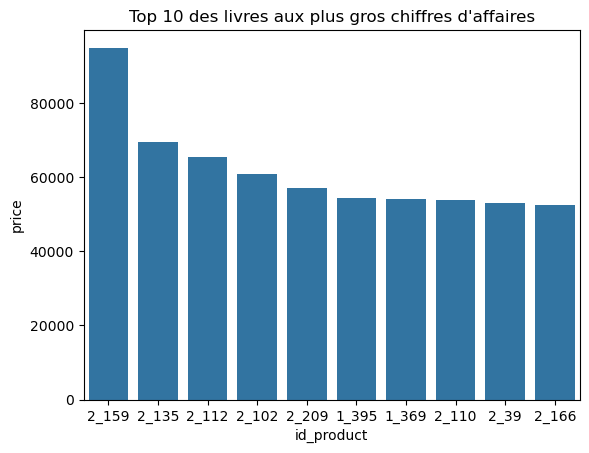

In [87]:
sns.barplot(x= 'id_product',y='price',data = df_final.pivot_table(index=['id_product', 'category'], aggfunc={'price': np.sum}).sort_values(by='price', ascending=False).reset_index().head(10)
)
plt.title("Top 10 des livres aux plus gros chiffres d'affaires")
plt.show()

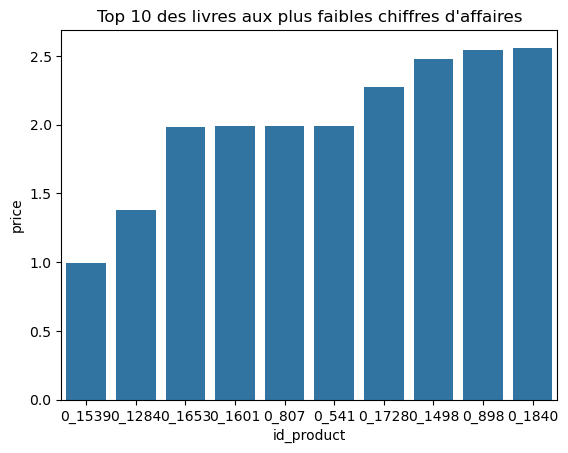

In [89]:
sns.barplot(x= 'id_product',y='price',data = df_final.pivot_table(index=['id_product', 'category'], aggfunc={'price': np.sum}).sort_values(by='price', ascending=True).reset_index().head(10))
plt.title("Top 10 des livres aux plus faibles chiffres d'affaires")
plt.show()

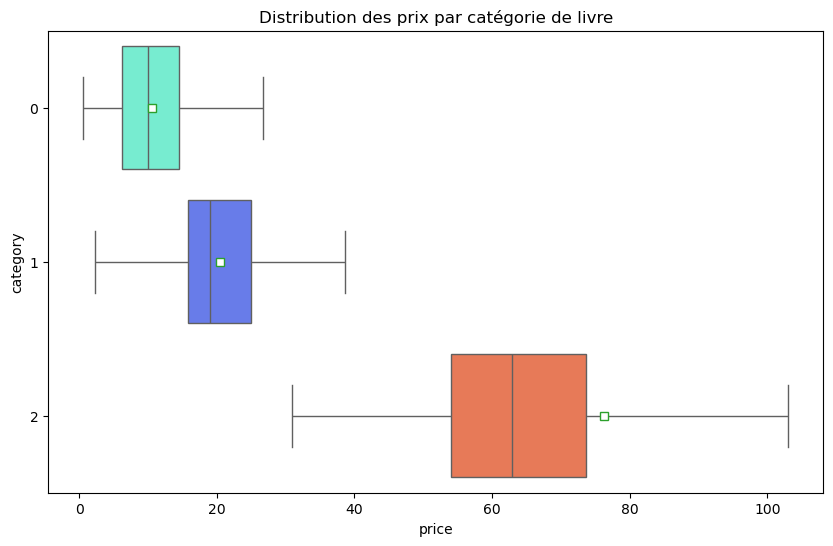

In [91]:
# Distribution des catégories avec moyenne des prix
plt.figure(figsize=(10,6))
sns.boxplot(data=df_final, y='category', x='price', orient='h', showfliers=False, showmeans=True, palette=["#64ffda", "#536dfe", "#ff6e40"], meanprops={"marker":"s","markerfacecolor":"white"})
plt.title('Distribution des prix par catégorie de livre')
plt.show()

In [93]:
df_final

,id_product,date,session_id,client_id,sex,birthday,age,tranche_age,price,category,year,Year_Month
480353,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,f,1967,58,50-59,11.99,0,2021,2021-03
428221,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,m,1960,65,60-69,19.37,0,2021,2021-03
462423,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,m,1988,37,30-39,4.50,0,2021,2021-03
488002,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,f,1989,36,30-39,6.55,0,2021,2021-03
438813,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,f,1956,69,60-69,16.49,0,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...
184553,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,f,1996,29,20-29,21.92,1,2023,2023-02
587825,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,f,1994,31,30-39,48.99,2,2023,2023-02
130101,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,f,1985,40,40-49,26.99,1,2023,2023-02
550122,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,m,1953,72,70-79,8.99,0,2023,2023-02


In [95]:
# Total des achats (montant)
df_mean_buy_client = (
    df_final
    .loc[:, ['client_id', 'price']]
    .groupby('client_id')
    .agg(total_achats=('price', 'sum'))
    .reset_index()
)

In [97]:
# Nombre d'achats (nombre de produits achetés par client)
df_nombre_achats = (
    df_final
    .groupby('client_id')['id_product']
    .count()
    .reset_index()
    .rename(columns={'id_product': 'nombre_achats'})
)

In [99]:
# Fusion des deux
df_mean_buy_client = pd.merge(df_mean_buy_client, df_nombre_achats, on='client_id', how='left')

df_mean_buy_client.head()

,client_id,total_achats,nombre_achats
0,c_1,558.18,39
1,c_10,1353.60,58
2,c_100,254.85,8
3,c_1000,2261.89,125
4,c_1001,1812.86,102


In [101]:
# calcul du panier moyen
df_mean_buy_client['panier_moyen'] = df_mean_buy_client['total_achats'] / df_mean_buy_client['nombre_achats']

In [103]:
# regrouper par année/mois/jour la somme des prix
df_ca_mois = df_final.groupby('Year_Month')['price'].sum().to_frame()
df_ca_mois = df_ca_mois.reset_index()
df_ca_mois['Year_Month'].count()


24

In [105]:
df_mean_buy_client['frequence_achat_mensuel'] = df_mean_buy_client['nombre_achats'] / df_ca_mois['Year_Month'].count()

In [107]:
df_final = pd.merge(df_mean_buy_client, df_final, on=['client_id'], how='left')

In [109]:
df_final

,client_id,total_achats,nombre_achats,panier_moyen,frequence_achat_mensuel,id_product,date,session_id,sex,birthday,age,tranche_age,price,category,year,Year_Month
0,c_1,558.18,39,14.312308,1.625000,0_1470,2021-06-11 21:02:39.382765,s_47346,m,1955,70,70-79,19.53,0,2021,2021-06
1,c_1,558.18,39,14.312308,1.625000,0_513,2021-07-21 22:41:38.769525,s_65433,m,1955,70,70-79,11.99,0,2021,2021-07
2,c_1,558.18,39,14.312308,1.625000,0_1186,2021-07-25 12:17:34.446678,s_66947,m,1955,70,70-79,12.30,0,2021,2021-07
3,c_1,558.18,39,14.312308,1.625000,0_1448,2021-07-26 17:37:29.438136,s_67467,m,1955,70,70-79,18.94,0,2021,2021-07
4,c_1,558.18,39,14.312308,1.625000,0_1475,2021-07-27 10:30:00.293075,s_67769,m,1955,70,70-79,11.99,0,2021,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679106,c_999,701.40,46,15.247826,1.916667,0_1360,2023-01-15 17:53:15.077669,s_327362,m,1964,61,60-69,4.33,0,2023,2023-01
679107,c_999,701.40,46,15.247826,1.916667,1_351,2023-01-21 17:16:06.807620,s_330231,m,1964,61,60-69,28.99,1,2023,2023-01
679108,c_999,701.40,46,15.247826,1.916667,1_727,2023-01-21 17:40:50.856434,s_330231,m,1964,61,60-69,16.99,1,2023,2023-01
679109,c_999,701.40,46,15.247826,1.916667,0_1442,2023-01-28 13:12:42.429052,s_333631,m,1964,61,60-69,4.89,0,2023,2023-01


In [111]:
df_final['price'].sum() 

11853728.680000002

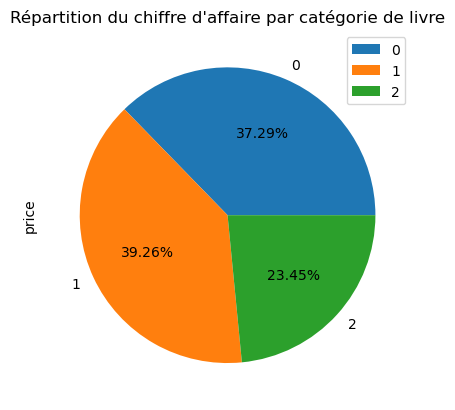

In [113]:
# Chiffre d'affaires par catégorie
data=df_final.pivot_table(index='category', aggfunc={'price': np.sum}).plot(
    kind='pie', y='price',
    legend=True,
    autopct=lambda x: str(round(x, 2)) + '%'
)
plt.title("Répartition du chiffre d'affaire par catégorie de livre")
plt.show()


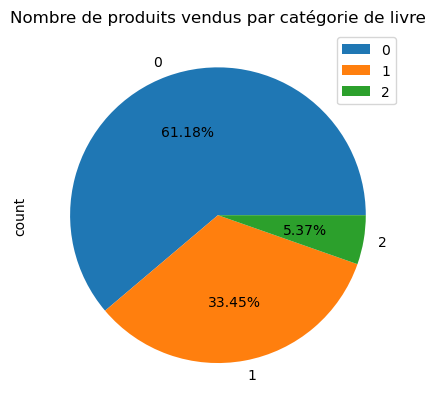

In [115]:
data=df_final['category'].value_counts().plot(
    kind='pie', y='price',
    legend=True,
    autopct=lambda x: str(round(x, 2)) + '%'
)
plt.title("Nombre de produits vendus par catégorie de livre")
plt.show()

In [117]:
df_nb_transaction_client = df_final[['client_id','id_product','tranche_age','price']]

In [119]:
df_nb_transaction_client

,client_id,id_product,tranche_age,price
0,c_1,0_1470,70-79,19.53
1,c_1,0_513,70-79,11.99
2,c_1,0_1186,70-79,12.30
3,c_1,0_1448,70-79,18.94
4,c_1,0_1475,70-79,11.99
...,...,...,...,...
679106,c_999,0_1360,60-69,4.33
679107,c_999,1_351,60-69,28.99
679108,c_999,1_727,60-69,16.99
679109,c_999,0_1442,60-69,4.89


In [121]:
# nombre de transaction par tranche age par client au total
df_nb_transaction_client.groupby(['tranche_age'])['client_id'].count().reset_index().sort_values(by='client_id',ascending=False)

,tranche_age,client_id
3,40-49,229612
2,30-39,140336
4,50-59,137169
5,60-69,64663
1,20-29,58636
6,70-79,32916
7,80-89,13719
8,90-99,2060
0,10-19,0


In [123]:
# nombre de transaction par client
df_nb_transaction_client = df_nb_transaction_client.groupby(['client_id'])['id_product'].value_counts().to_frame()# Nombre de transactions par client
df_nb_transaction_client = (
    df_final
    .groupby('client_id')['id_product']
    .count()
    .reset_index()
    .rename(columns={'id_product': 'nb_transaction'})
)

In [125]:
# Trier et sélectionner les 10 clients avec le plus de transactions
df_top10 = df_nb_transaction_client.sort_values(by='nb_transaction', ascending=False).head(10)

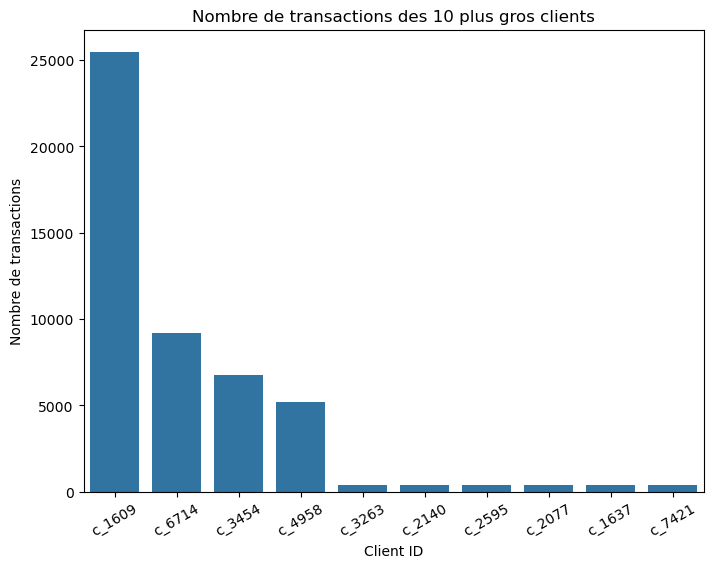

In [127]:
# Visualisation
plt.figure(figsize=(8,6))
sns.barplot(data=df_top10, x='client_id', y='nb_transaction')
plt.title("Nombre de transactions des 10 plus gros clients")
plt.xticks(rotation=30)
plt.xlabel('Client ID')
plt.ylabel('Nombre de transactions')
plt.show()

**on constate que le client c_4958 gros chiffre d'affaire moins de d'achat**

In [130]:
df_final['pro_part'] = 'part'

In [132]:
# Liste des ID clients à filtrer
client_ids_to_filter = ['c_1609', 'c_4958', 'c_6714', 'c_3454']

# Filtrer les lignes avec les ID clients spécifiés
df_final.loc[df_final['client_id'].isin(client_ids_to_filter), 'pro_part'] = 'pro'

In [134]:
df_pro = df_final.loc[df_final['pro_part']=='pro']
df_part = df_final.loc[df_final['pro_part']=='part']

In [136]:
# nombre de transaction total / nombre de transaction pro pour avoir le nombre de pourcentage de transaction des pro
nb_t = df_pro.groupby(['client_id']).count()['id_product'].sum() / df_final.groupby(['client_id']).count()['id_product'].sum() * 100
print("pourcentage des transactions des 4 pro est de",(nb_t),"%")

pourcentage des transactions des 4 pro est de 6.8669186627811944 %


In [138]:
print("chiffre d'affaire des 4 pro est de",round(df_pro['price'].sum() / df_part['price'].sum() * 100, 2),"%")

chiffre d'affaire des 4 pro est de 8.03 %


In [140]:
# ca des 4 clients prof
df_pro.groupby('client_id')['price'].sum().to_frame().sort_values(by='price', ascending=False)


,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153598.92
c_3454,113637.93


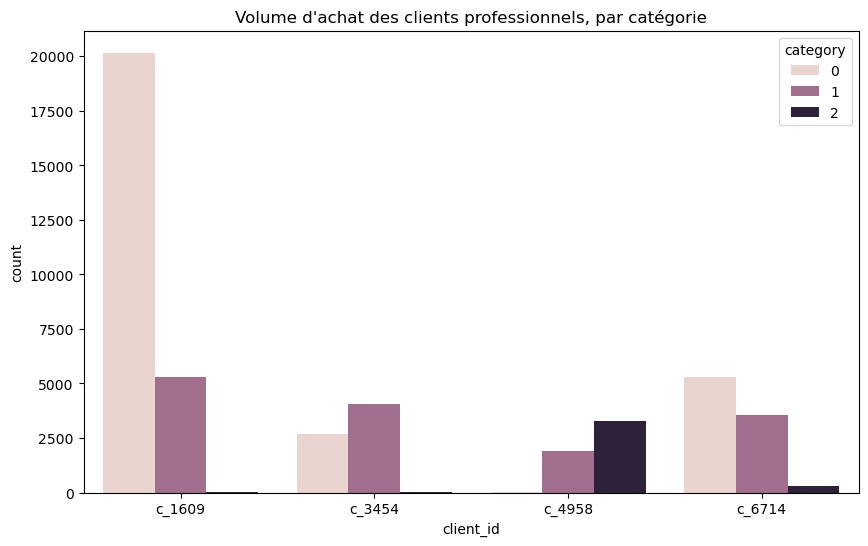

In [142]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_pro, x='client_id', hue='category')
plt.title("Volume d'achat des clients professionnels, par catégorie")
plt.show()

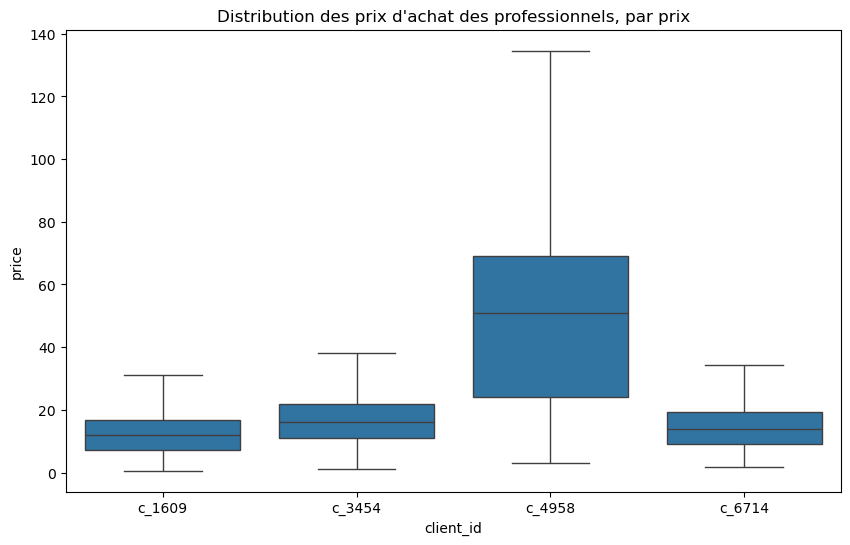

In [144]:
#price

plt.figure(figsize=(10,6))
# showfliers enleve les outliers
sns.boxplot(data=df_pro, y='price', x='client_id', showfliers=False)
plt.title("Distribution des prix d'achat des professionnels, par prix")
plt.show()

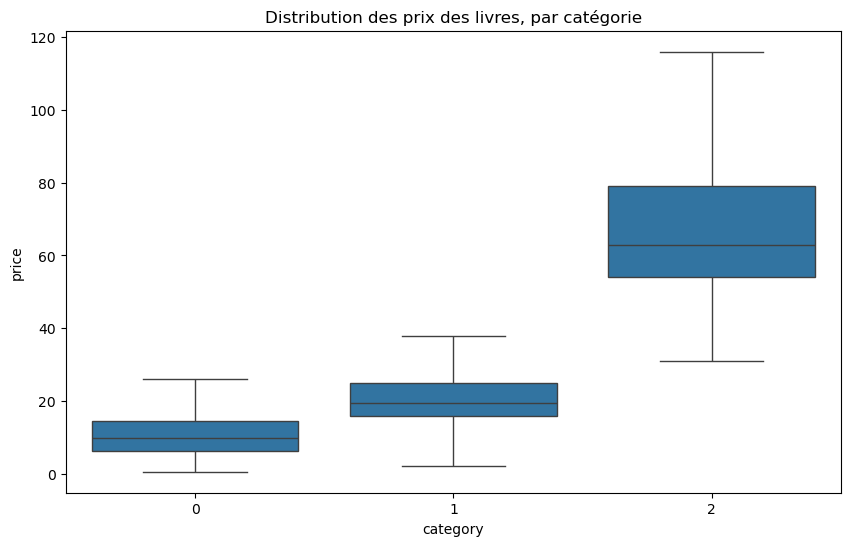

In [146]:
#Category

plt.figure(figsize=(10,6))
# showfliers enleve les outliers
sns.boxplot(data=df_pro, y='price', x='category', showfliers=False)
plt.title("Distribution des prix des livres, par catégorie")
plt.show()

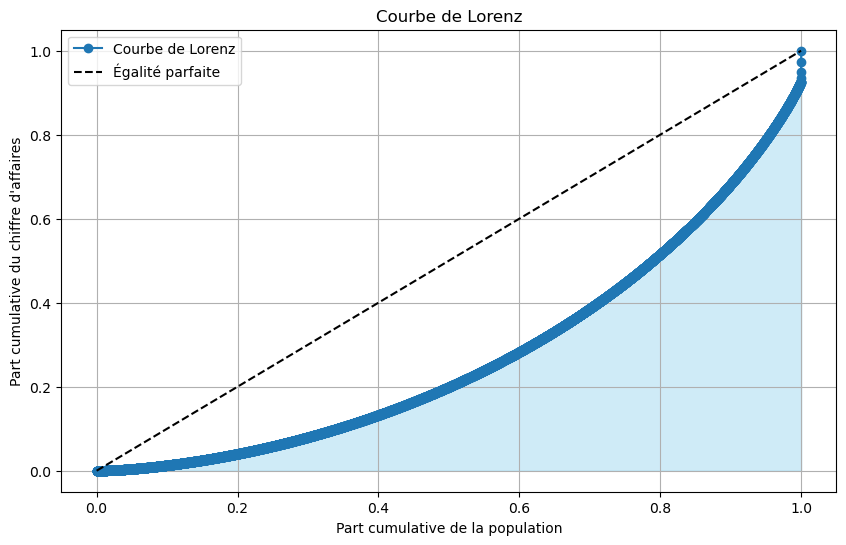

Indice de Gini : 0.446


In [148]:
# courbe de lorenz avec que les clients totals
df_lorenz = df_final.sort_values(by='price', ascending=True)
df_grouped = df_lorenz.groupby('client_id')['price'].sum().sort_values()

# Calculer les proportions cumulées
cumulative_population = df_grouped.index.to_series().reset_index(drop=True).reset_index()
cumulative_population['cumulative_population'] = (cumulative_population['index'] + 1) / cumulative_population['index'].max()

cumulative_revenue = df_grouped.cumsum() / df_grouped.sum()
n = len(cumulative_population)
# Tracer la courbe de Lorenz
plt.figure(figsize=(10, 6))
plt.plot(cumulative_population['cumulative_population'], cumulative_revenue, marker='o', label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], 'k--', label='Égalité parfaite')
plt.fill_between(cumulative_population['cumulative_population'], cumulative_revenue, color='skyblue', alpha=0.4)
plt.xlabel('Part cumulative de la population')
plt.ylabel('Part cumulative du chiffre d\'affaires')
plt.title('Courbe de Lorenz')
plt.legend()
plt.grid(True)
plt.show()

# Calcul de l'indice de Gini
AUC = (cumulative_revenue.sum() -cumulative_revenue[-1]/2 -cumulative_revenue[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

print(f'Indice de Gini : {gini:.3f}')


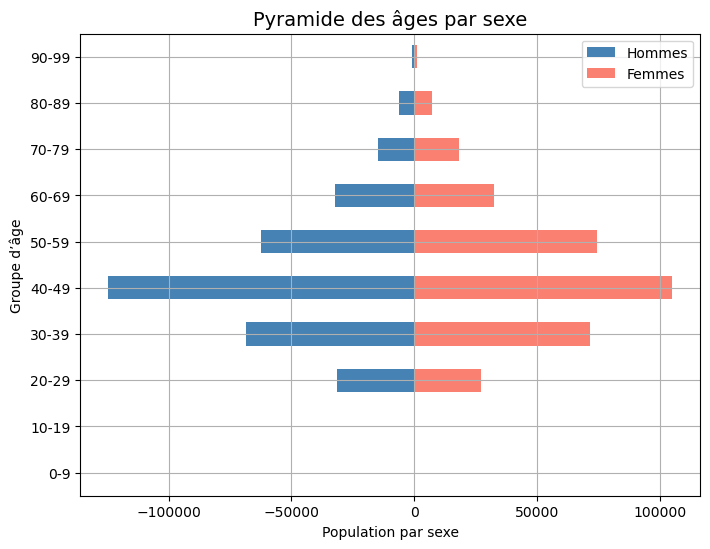

In [150]:
# 1. Créer des tranches d’âge 
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ["0-9","10-19","20-29","30-39","40-49",
          "50-59","60-69","70-79","80-89","90-99"]
df_final["groupe_age"] = pd.cut(
    df_final["age"],
    bins=bins, labels=labels, right=False
)

# 2. Compter par sexe et tranche d’âge
age_sex = df_final.groupby(
    ["groupe_age","sex"]
).size().unstack(fill_value=0)

# 3. Inverser les hommes en négatif (pour la pyramide)
age_sex["m"] = -age_sex["m"]

# 4. Tracer la pyramide
fig, ax = plt.subplots(figsize=(8,6))

age_sex["m"].plot(kind="barh", color="steelblue", ax=ax, label="Hommes")
age_sex["f"].plot(kind="barh", color="salmon", ax=ax, label="Femmes")

ax.set_title("Pyramide des âges par sexe", fontsize=14)
ax.set_xlabel("Population par sexe")
ax.set_ylabel("Groupe d’âge")
ax.legend()
plt.grid()
plt.legend()
plt.show()

In [152]:
# regrouper par année/mois/jour la somme des prix
df_ca_mois = df_part.groupby('Year_Month')['price'].sum().to_frame()
df_ca_mois = df_ca_mois.reset_index()
df_ca_mois.set_index(['Year_Month'], inplace = True)

In [154]:
df_ca_mois

,price
Year_Month,
2021-03,445918.71
2021-04,439337.85
2021-05,454887.46
2021-06,447102.17
2021-07,447593.15
2021-08,446002.30
2021-09,470921.80
2021-10,296728.35
2021-11,478092.08


In [156]:
df_ca = df_final.groupby('Year_Month')['price'].sum().to_frame()
df_ca = df_ca.reset_index()
df_ca.set_index(['Year_Month'], inplace = True)

In [158]:
df_ca.index = pd.to_datetime(df_ca.index)

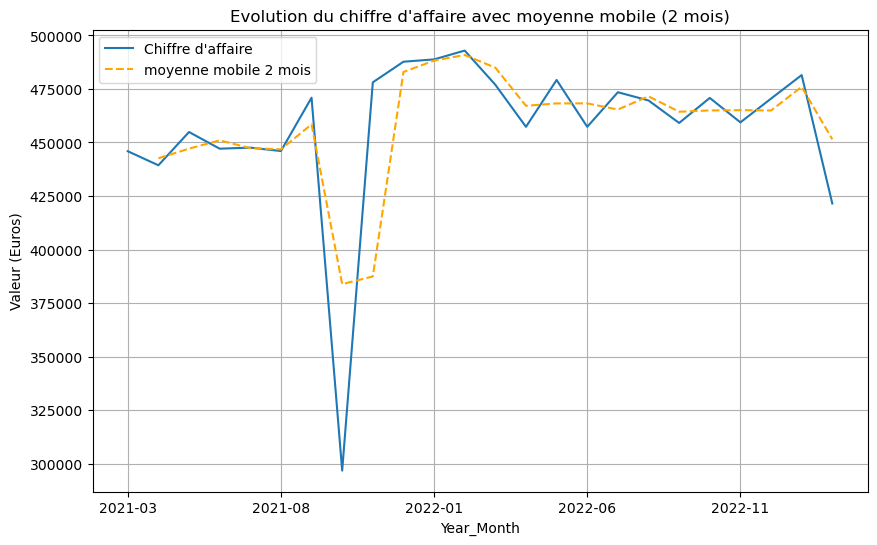

In [160]:
plt.figure(figsize=(10,6))
df_ca_mois['price'].plot(label="Chiffre d'affaire")

# Moyenne mobile sur 2 mois
df_ca_mois['price'].rolling(window=2, center=True).mean().plot(
    label='moyenne mobile 2 mois', ls='--', color='orange')

plt.legend()
plt.title("Evolution du chiffre d'affaire avec moyenne mobile (2 mois)")
plt.ylabel("Valeur (Euros)")
plt.xlabel("Year_Month")
plt.grid(True)
plt.show()


**Comme on peut le voir sur ce graphique, le chiffre d’affaires journalier est assez volatil, avec des variations importantes d’un jour à l’autre. On remarque une chute marquée en septembre 2021, suivie d’une reprise. La courbe de la moyenne mobile sur 60 jours permet de lisser ces fluctuations et de dégager une tendance générale : après cette baisse ponctuelle, le chiffre d’affaires se stabilise autour de 15 000 à 17 000. Cela montre une meilleure régularité dans l’activité, mais aussi un palier qu’il faudra dépasser pour relancer la croissance.**

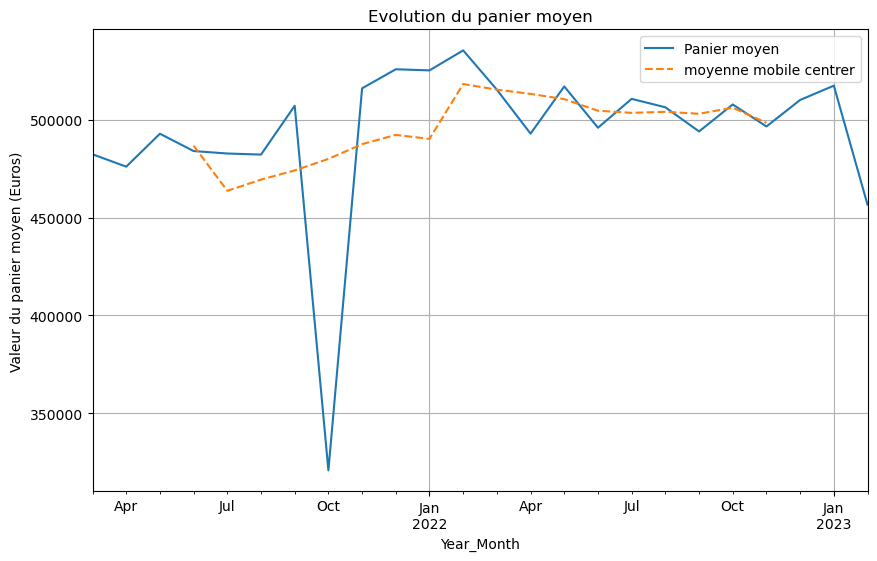

In [163]:
plt.figure(figsize=(10,6))
df_ca['price'].resample('M').mean().plot(label='Panier moyen')
df_ca['price'].resample('M').mean().rolling(window=7,center=True).mean().plot(label='moyenne mobile centrer',ls='--')
plt.legend()
plt.title('Evolution du panier moyen')
plt.ylabel('Valeur du panier moyen (Euros)')
plt.grid()
plt.show()

In [165]:
# je fais en sorte que l'index nous sert de datetime
df_ca_mois.index = pd.to_datetime(df_ca_mois.index)


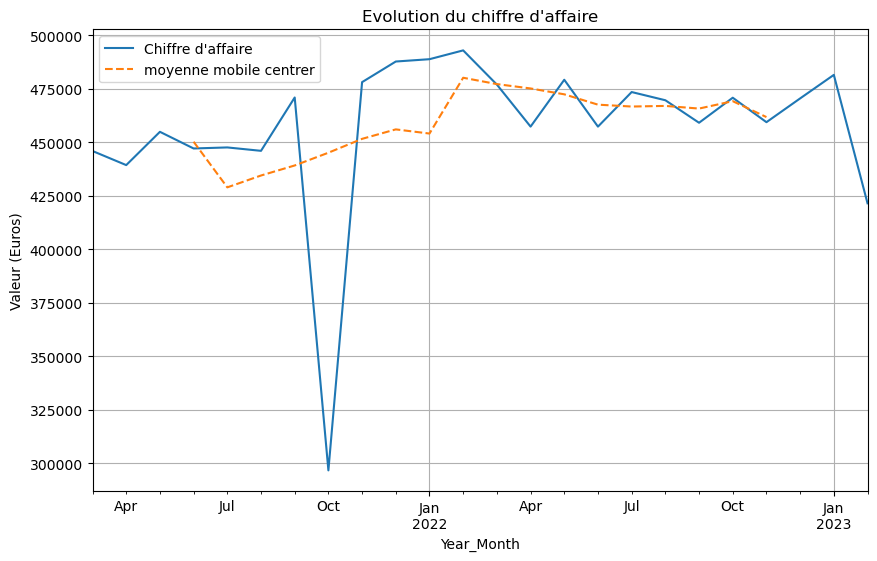

In [167]:
# chiffre d'affaire global au file du temps
plt.figure(figsize=(10,6))
df_ca_mois['price'].plot(label="Chiffre d'affaire")
df_ca_mois['price'].rolling(window=7,center=True).mean().plot(label='moyenne mobile centrer',ls='--')
plt.legend()
plt.title("Evolution du chiffre d'affaire")
plt.ylabel('Valeur (Euros)')
plt.grid()
plt.show()

## SEXE et CATEGORIE

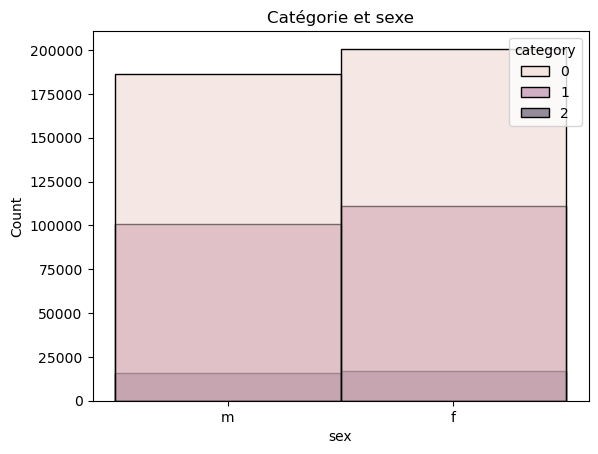

In [170]:
sns.histplot(data=df_part,x='sex', hue='category')
plt.title('Catégorie et sexe')
plt.show()

In [172]:
cont = pd.crosstab(df_part['sex'],df_part['category'])
cont

category,0,1,2
sex,,,
f,200793,111331,16980
m,186488,101017,15868


niveau de certitude", que l'on appelle seuil de significativité (P-Value)

test de l'indépendance :

H0 : Variables indépendantes si p-value > 5% H1 : Variables non indépendantes si p-value < 5%

Plus la valeur de p est petite, plus la probabilité de faire une erreur en rejetant l'hypothèse nulle est faible. Une valeur limite de 0,05 est souvent utilisée. Autrement dit, vous pouvez rejeter l'hypothèse nulle si la valeur de p est inférieure à 0,05

condition de validité du test :

1: Les mesures sont indépendantes
2: Pas d'effectifs théoriques inférieurs à 5 dans les cases du tableau
les conditions sont respectées pour le test paramétrique

In [177]:
# test chi-2
alpha = 0.05
chi2, pvalue, degrees, expected = chi2_contingency(cont)

# affichage du résultat
print("test chi-2's correlation coefficient:", chi2)
print("p-value:", pvalue)

if pvalue > alpha:
    print("H0 : Les deux variables qualitatives sont indépendantes si p-value > 5%")
else:
    print('H1 : Les deux variables qualitatives dépendent l’une de l’autre si p-value < 5%')

test chi-2's correlation coefficient: 20.213460693513895
p-value: 4.080400389217356e-05
H1 : Les deux variables qualitatives dépendent l’une de l’autre si p-value < 5%


## AGE et MONTANT TOTAL

In [310]:
# Définir 3 tranches d’âge : 20-40, 40-60, 60-99
bins = [20, 40, 60, 99]
labels = ['20-40', '40-60', '60-99']

# Créer la variable tranche_age
df_final['tranche_age'] = pd.cut(df_final['age'], bins=bins, labels=labels, right=False)

# Vérifier
print(df_final[['age', 'tranche_age']].head())


   age tranche_age
0   70       60-99
1   70       60-99
2   70       60-99
3   70       60-99
4   70       60-99


In [328]:
print("Âge minimum :", df_final['age'].min())
print("Âge maximum :", df_final['age'].max())


Âge minimum : 21
Âge maximum : 96


In [314]:

# S'assurer que price est numérique
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')


In [316]:
# 1) par client & tranche d’âge
df_tranche_age_montant = (
    df_final.groupby(['client_id','tranche_age'], observed=True)['price']
            .sum()
            .reset_index()
            .rename(columns={'price': 'montant_total'})
)

In [318]:
df_age_montant = (
    df_final.groupby(['client_id','age'], observed=True)['price']
            .sum()
            .reset_index()
            .rename(columns={'price': 'montant_total'})
)

In [320]:
df_age_montant = df_age_montant[df_age_montant['montant_total']<10000]

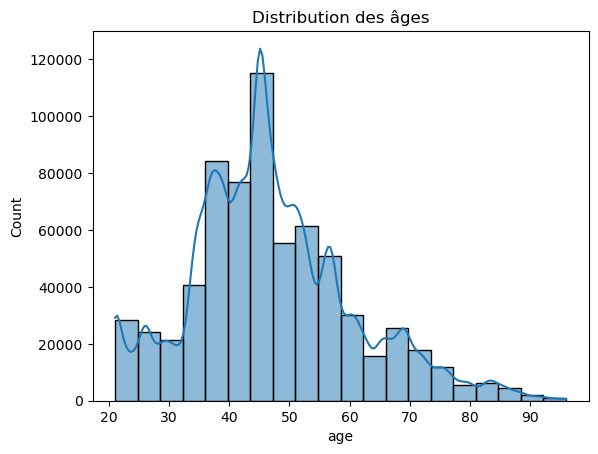

In [332]:
sns.histplot(df_final['age'], bins=20, kde=True)
plt.title("Distribution des âges")
plt.show()

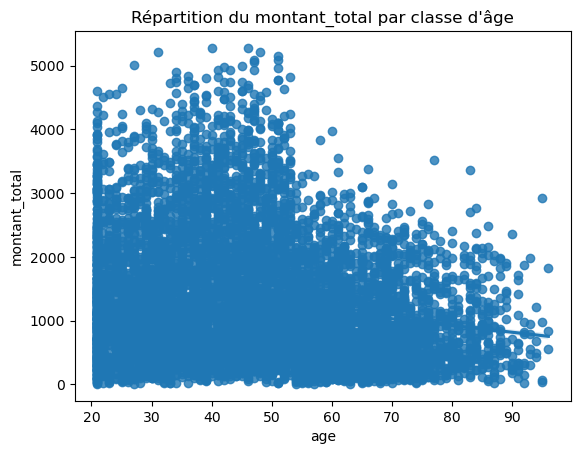

In [519]:
##sns.scatterplot(data=df_age_montant, x='age', y='montant_total')
sns.regplot(data=df_age_montant, x='age', y='montant_total')
plt.title("Répartition du montant_total par classe d'âge")
plt.show()

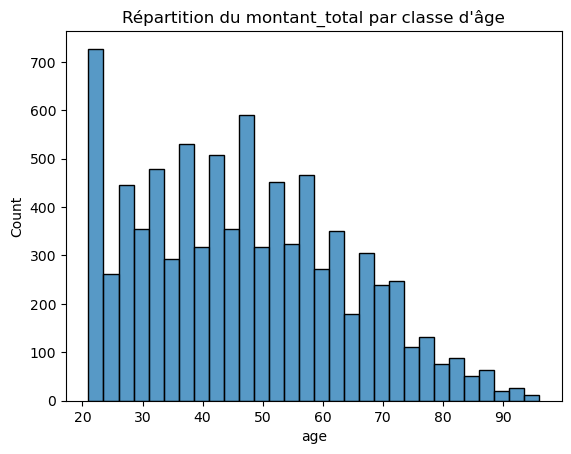

In [521]:
sns.histplot(data=df_age_montant, x='age')
plt.title("Répartition du montant_total par classe d'âge")
plt.show()

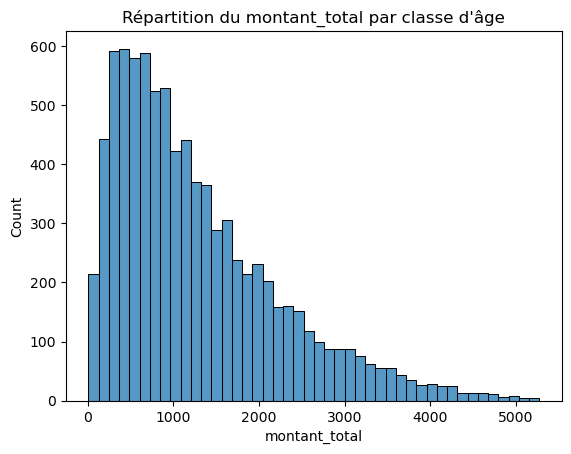

In [523]:
sns.histplot(data=df_age_montant, x='montant_total')
plt.title("Répartition du montant_total par classe d'âge")
plt.show()

In [340]:

corr, pval = spearmanr(df_age_montant["age"],df_age_montant["montant_total"])

# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées : p-value < 5%')

Spearman's correlation coefficient: -0.1851390805263805
p-value: 3.7882642621417936e-67
H1 : Variables corrélées : p-value < 5%


In [370]:
# le montant total dépensé change t'il en fonction de l'age du client ?

corr, pval = spearmanr(df_tranche_age_montant["tranche_age"],df_tranche_age_montant["montant_total"])

# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées : p-value < 5%')

Spearman's correlation coefficient: -0.16648698249094795
p-value: 1.7006754111328703e-54
H1 : Variables corrélées : p-value < 5%


In [342]:
# On crée une liste des montants par tranche d'âge
groupes = [g["montant_total"].values 
           for _, g in df_tranche_age_montant.groupby("tranche_age")]

# Test de Kruskal-Wallis
stat, pval = stats.kruskal(*groupes)

print("Statistique de Kruskal-Wallis:", stat)
print("p-value:", pval)

if pval > 0.05:
    print("H0 : Pas de différence significative entre les tranches d'âge")
else:
    print("H1 : Différence significative entre au moins deux tranches d'âge")


Statistique de Kruskal-Wallis: 340.3357339581704
p-value: 1.2503579902029653e-74
H1 : Différence significative entre au moins deux tranches d'âge


In [344]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_age_montant['montant_total'], 'norm')

KstestResult(statistic=0.9999999998604823, pvalue=0.0, statistic_location=6.31, statistic_sign=-1)

In [346]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_age_montant['age'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=21, statistic_sign=-1)

In [348]:
# deuxième méthode pour vérifier si la distribution est normal
stats.normaltest(df_age_montant['montant_total'])

NormaltestResult(statistic=1458.6693034353948, pvalue=0.0)

In [350]:
# deuxième méthode pour vérifier si la distribution est normal
stats.normaltest(df_age_montant['age'])

NormaltestResult(statistic=504.23834085051374, pvalue=3.2065314382236354e-110)

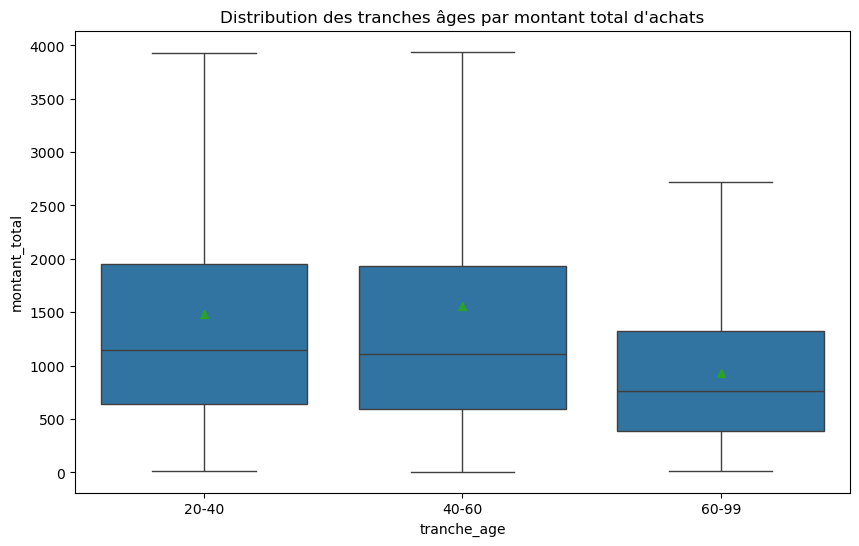

In [354]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_tranche_age_montant, x='tranche_age', y='montant_total', showfliers=False, showmeans=True)
plt.title("Distribution des tranches âges par montant total d'achats")
plt.show()

In [372]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_tranche_age_montant['montant_total'], 'norm')

KstestResult(statistic=0.9999999998604823, pvalue=0.0, statistic_location=6.31, statistic_sign=-1)

In [374]:
# deuxième méthode pour vérifier si la distribution est normal
stats.normaltest(df_tranche_age_montant['montant_total'])

NormaltestResult(statistic=27513.424779935845, pvalue=0.0)

In [376]:
stats.anderson(df_tranche_age_montant['montant_total'], dist='norm')

AndersonResult(statistic=2139.4683085598554, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1378.3405441860464, scale=5182.542487986265)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## AGE et FREQUENCE D'ACHAT

In [382]:
frequence_achat_tranche = (
    df_final.groupby(['tranche_age','client_id'], observed=True)['session_id']
            .nunique()
            .reset_index()
            .rename(columns={'session_id': 'frequence_achat'})
)

In [384]:
frequence_achat_tranche 

,tranche_age,client_id,frequence_achat
0,20-40,c_100,5
1,20-40,c_1009,9
2,20-40,c_101,9
3,20-40,c_1010,23
4,20-40,c_1011,21
...,...,...,...
8595,60-99,c_987,11
8596,60-99,c_988,79
8597,60-99,c_99,37
8598,60-99,c_995,9


In [412]:
df_age_frequence = (
    df_final.groupby(['client_id','age'], observed=True)['session_id']
            .nunique()
            .reset_index()
            .rename(columns={'session_id': 'frequence_achat'})
)

In [414]:
df_age_frequence

,client_id,age,frequence_achat
0,c_1,70,33
1,c_10,69,34
2,c_100,33,5
3,c_1000,59,93
4,c_1001,43,47
...,...,...,...
8595,c_995,70,9
8596,c_996,55,79
8597,c_997,31,24
8598,c_998,24,23


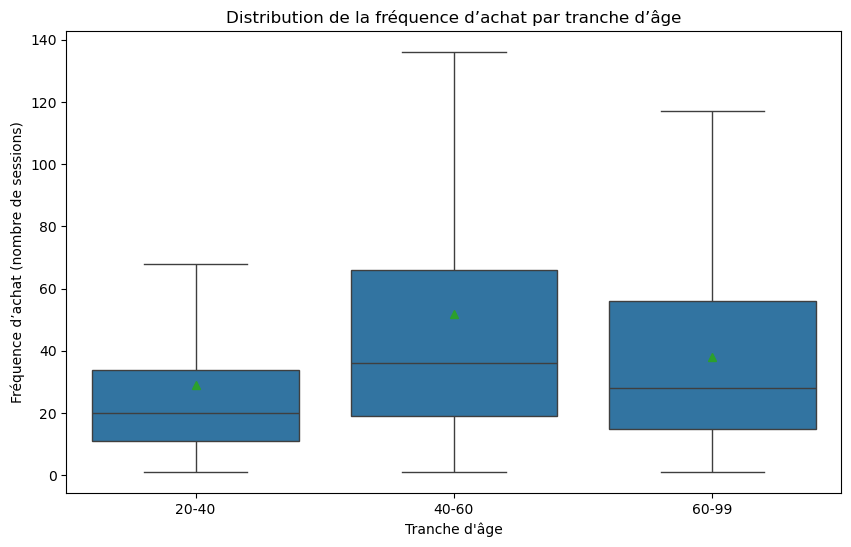

In [416]:
plt.figure(figsize=(10,6))
sns.boxplot(data=frequence_achat_tranche, x='tranche_age', y='frequence_achat',
            showfliers=False, showmeans=True)
plt.title("Distribution de la fréquence d’achat par tranche d’âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence d’achat (nombre de sessions)")
plt.show()

In [418]:
df_age_frequence['frequence_achat'].describe()

count     8600.000000
mean        39.799419
std        144.715605
min          1.000000
25%         15.000000
50%         26.000000
75%         50.000000
max      10997.000000
Name: frequence_achat, dtype: float64

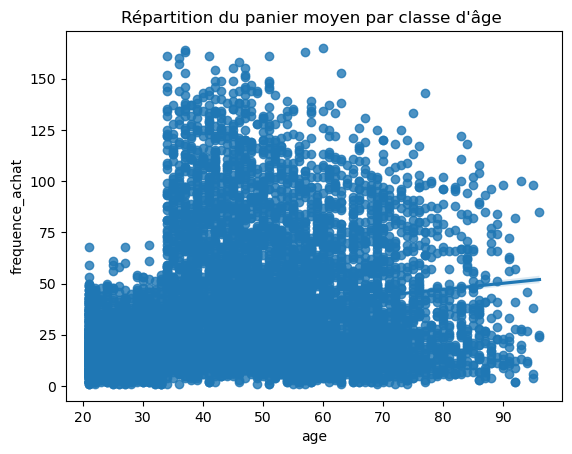

In [532]:
df_age_frequence_filtre = df_age_frequence[df_age_frequence['frequence_achat'] < 500]

sns.regplot(data=df_age_frequence_filtre, x='age', y='frequence_achat')
plt.title("Répartition du panier moyen par classe d'âge ")
plt.show()


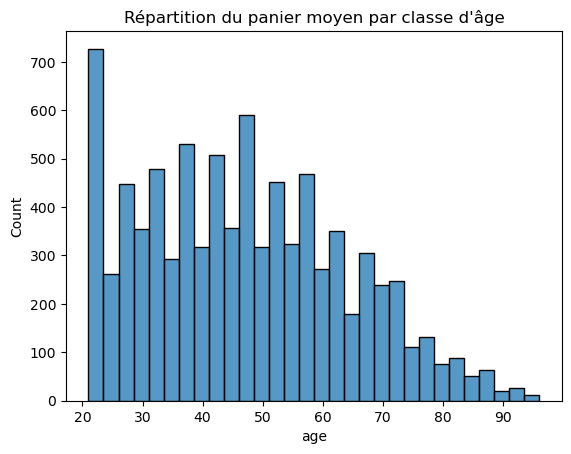

In [422]:
sns.histplot(data=df_age_frequence, x='age')
plt.title("Répartition du panier moyen par classe d'âge")
plt.show()

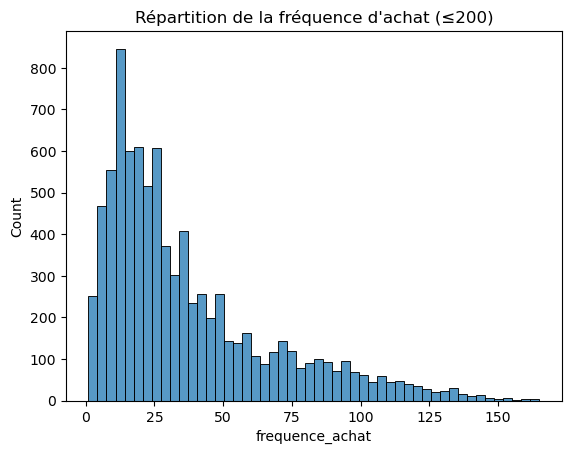

In [426]:
sns.histplot(data=df_age_frequence[df_age_frequence['frequence_achat'] <= 200],
             x='frequence_achat', bins=50)
plt.title("Répartition de la fréquence d'achat (≤200)")
plt.show()


In [428]:
# Corrélation Spearman entre âge et fréquence d'achat
corr, pval = spearmanr(df_age_frequence["age"], df_age_frequence["frequence_achat"])

print("Spearman correlation coefficient:", corr)
print("p-value:", pval)

if pval < 0.05:
    print("✅ Corrélation significative")
else:
    print("❌ Pas de corrélation significative")

Spearman correlation coefficient: 0.21209989410295918
p-value: 4.658792495154888e-88
✅ Corrélation significative


In [534]:

# On crée une liste des frequence_achat par tranche d'âge
groupes = [g["frequence_achat"].values 
           for _, g in frequence_achat_tranche .groupby("tranche_age")]

# Test de Kruskal-Wallis
stat, pval = stats.kruskal(*groupes)

print("Statistique de Kruskal-Wallis:", stat)
print("p-value:", pval)

if pval > 0.05:
    print("H0 : Pas de différence significative entre les tranches d'âge")
else:
    print("H1 : Différence significative entre au moins deux tranches d'âge")


Statistique de Kruskal-Wallis: 639.2235185657244
p-value: 1.5645036909467648e-139
H1 : Différence significative entre au moins deux tranches d'âge


In [436]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_age_frequence['frequence_achat'], 'norm')

KstestResult(statistic=0.9878361484799978, pvalue=0.0, statistic_location=3, statistic_sign=-1)

In [440]:
# première méthode pour vérifier si la distribution est normal
stats.kstest(df_age_frequence['age'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=21, statistic_sign=-1)

In [442]:
# deuxime méthode pour vérifier si la distribution est normal
stats.normaltest(frequence_achat_tranche['frequence_achat'], axis=0, nan_policy='propagate')

NormaltestResult(statistic=28869.8625565295, pvalue=0.0)

In [444]:
stats.anderson(frequence_achat_tranche['frequence_achat'], dist='norm')

AndersonResult(statistic=2028.2512457759094, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=39.799418604651166, scale=144.71560466288685)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## AGE et TAILLE PANIER MOYEN

In [451]:
print("Check prix > 0 :", (df_final['price'] > 0).sum())
print("Somme totale price :", df_final['price'].sum())
print("Nb lignes :", len(df_final))


Check prix > 0 : 679111
Somme totale price : 11853728.680000002
Nb lignes : 679111


In [453]:
# Vérifier que price est bien numérique
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')

# Vérifier les NaN
print(df_final[['price','session_id']].isna().sum())


price         0
session_id    0
dtype: int64


In [455]:
df_age_panier_moyen = (
    df_final.groupby(['age', 'client_id'])   
    .agg(
        total_achats=('price', 'sum'),        # somme des montants
        nombre_achats=('session_id', 'nunique')  # nombre de sessions uniques
    )
    .reset_index()
)

# calcul du panier moyen
df_age_panier_moyen['panier_moyen'] = (
    df_age_panier_moyen['total_achats'] / df_age_panier_moyen['nombre_achats'].replace(0, np.nan)
)
df_age_panier_moyen = df_age_panier_moyen[df_age_panier_moyen['total_achats'] > 0]


In [457]:
df_age_panier_moyen

,age,client_id,total_achats,nombre_achats,panier_moyen
0,21,c_1042,348.75,8,43.593750
1,21,c_1046,919.58,15,61.305333
2,21,c_1065,1124.66,20,56.233000
3,21,c_1088,590.47,11,53.679091
4,21,c_109,415.19,5,83.038000
...,...,...,...,...,...
8595,95,c_4679,43.96,4,10.990000
8596,95,c_7232,2927.99,98,29.877449
8597,96,c_5302,549.02,24,22.875833
8598,96,c_577,1829.96,85,21.528941


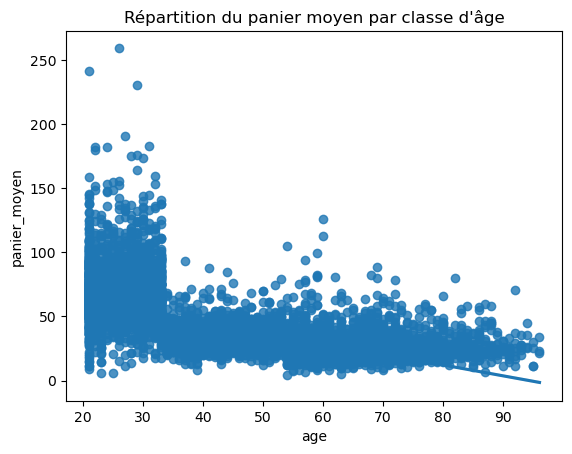

In [461]:
sns.regplot(data=df_age_panier_moyen, x='age', y='panier_moyen')
plt.title("Répartition du panier moyen par classe d'âge")
plt.show()

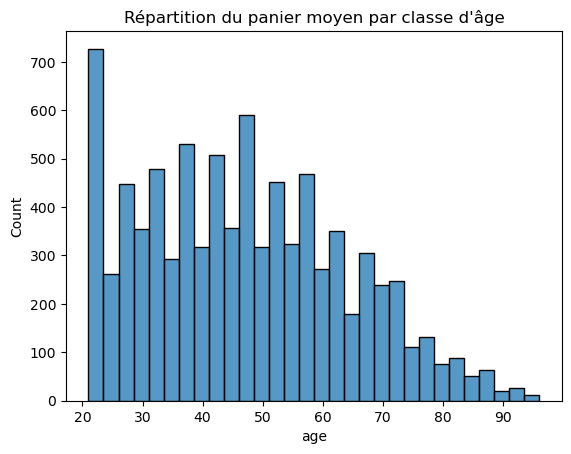

In [467]:
sns.histplot(data=df_age_panier_moyen, x='age')
plt.title("Répartition du panier moyen par classe d'âge")
plt.show()

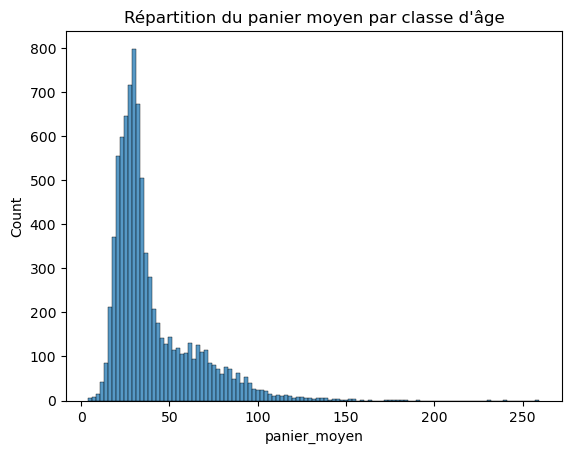

In [469]:
sns.histplot(data=df_age_panier_moyen, x='panier_moyen')
plt.title("Répartition du panier moyen par classe d'âge")
plt.show()

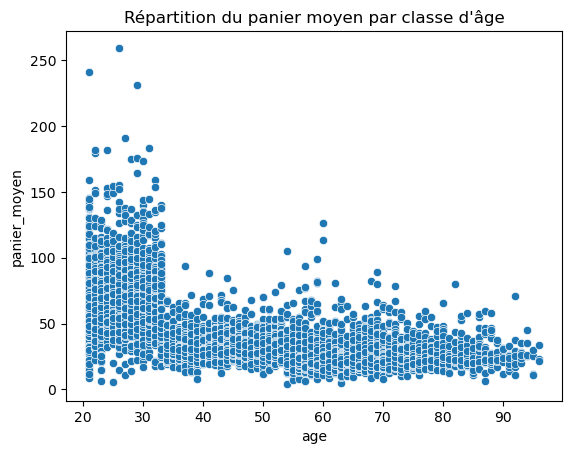

In [475]:
sns.scatterplot(data=df_age_panier_moyen, x='age', y='panier_moyen')
plt.title("Répartition du panier moyen par classe d'âge")
plt.show()

In [477]:
df_panier = df_age_panier_moyen.loc[:,['age','panier_moyen']].sort_values(by='panier_moyen')

In [479]:
# 1. Kolmogorov-Smirnov
ks_test = stats.kstest(df_age_panier_moyen['panier_moyen'].dropna(), 'norm')
print("Kolmogorov-Smirnov test:", ks_test)

# 2. Shapiro-Wilk (meilleur pour petites tailles d’échantillons)
shapiro_test = stats.shapiro(df_age_panier_moyen['panier_moyen'].dropna())
print("Shapiro-Wilk test:", shapiro_test)

# 3. D’Agostino K² (plus robuste pour grands échantillons)
dagostino_test = stats.normaltest(df_age_panier_moyen['panier_moyen'].dropna(), axis=0)
print("D’Agostino K² test:", dagostino_test)

Kolmogorov-Smirnov test: KstestResult(statistic=0.9999833762362703, pvalue=0.0, statistic_location=4.15, statistic_sign=-1)
Shapiro-Wilk test: ShapiroResult(statistic=0.8156543659345605, pvalue=1.744621935059503e-71)
D’Agostino K² test: NormaltestResult(statistic=3422.5474714391353, pvalue=0.0)


In [483]:
# Garder seulement les colonnes numériques
numeric_cols =df_panier.select_dtypes(include='number')

# Matrice de corrélation avec Spearman
corr_spearman = numeric_cols.corr(method='spearman')

# Heatmap stylisée
corr_spearman.style.background_gradient(cmap='coolwarm').format("{:.2f}")


,age,panier_moyen
age,1.00,-0.70
panier_moyen,-0.70,1.00


In [485]:
corr, pval = spearmanr(df_age_panier_moyen["age"],df_age_panier_moyen["panier_moyen"])
 
# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées p-value < 5%')

Spearman's correlation coefficient: -0.7010149049310639
p-value: 0.0
H1 : Variables corrélées p-value < 5%


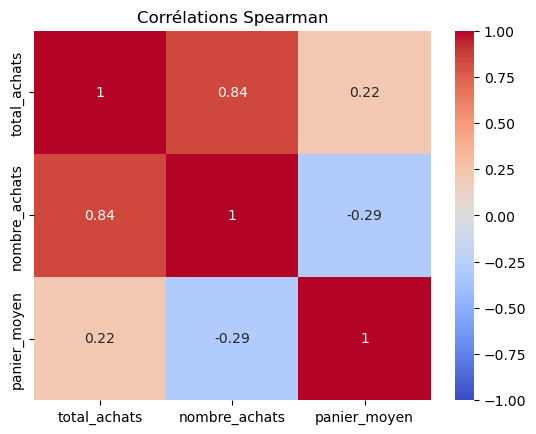

In [487]:
numeric_cols = df_age_panier_moyen[['total_achats', 'nombre_achats', 'panier_moyen']]
corr_spearman = numeric_cols.corr(method='spearman')

sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélations Spearman")
plt.show()


## AGE et CATEGORIE LIVRES

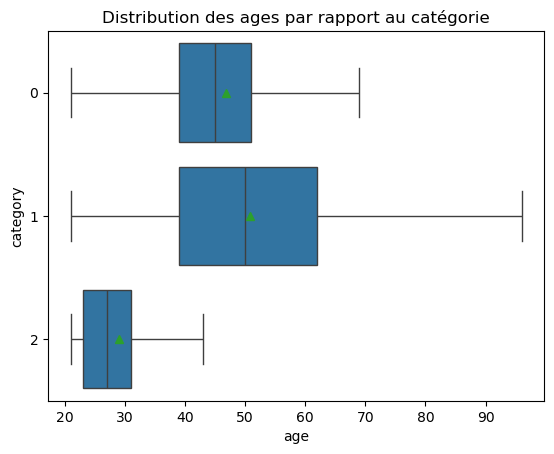

In [490]:
sns.boxplot(data=df_part, x='age', y='category', orient='h', showfliers=False, showmeans=True)
plt.title("Distribution des ages par rapport au catégorie")
plt.show()


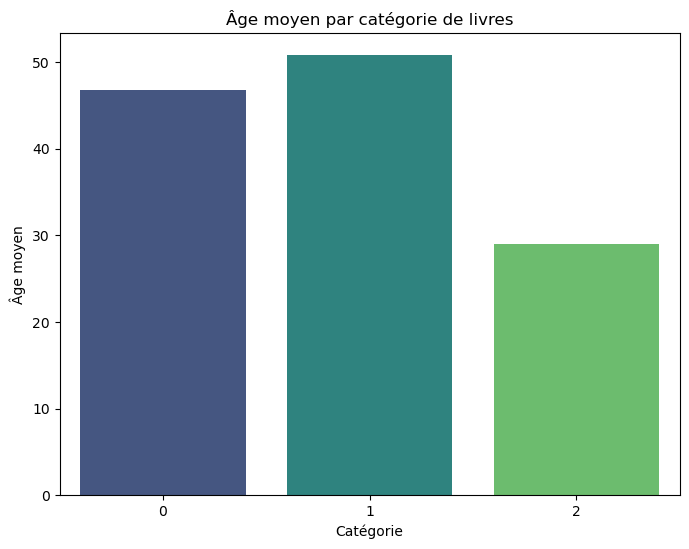

In [513]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_part, x='category', y='age', ci=None, palette="viridis")
plt.title("Âge moyen par catégorie de livres")
plt.xlabel("Catégorie")
plt.ylabel("Âge moyen")
plt.show()


In [492]:
# moyenne des trois groupes
df_part.groupby('category')['age'].mean()

category
0    46.794563
1    50.802913
2    28.965508
Name: age, dtype: float64

In [494]:
# variance des trois groupes
df_part.groupby('category')['age'].var()

category
0    132.620783
1    249.434712
2     98.007304
Name: age, dtype: float64

Text(0.5, 1.0, 'Densité des moyennes avec le graphique des moyennes')

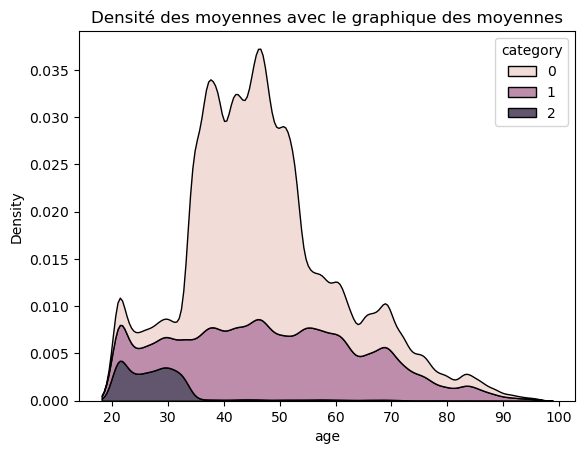

In [496]:
# Densité pour observer la distribution des ages en fonction de la catégorie
sns.kdeplot(data = df_part, x="age", hue = "category", multiple = "stack")
plt.title("Densité des moyennes avec le graphique des moyennes")

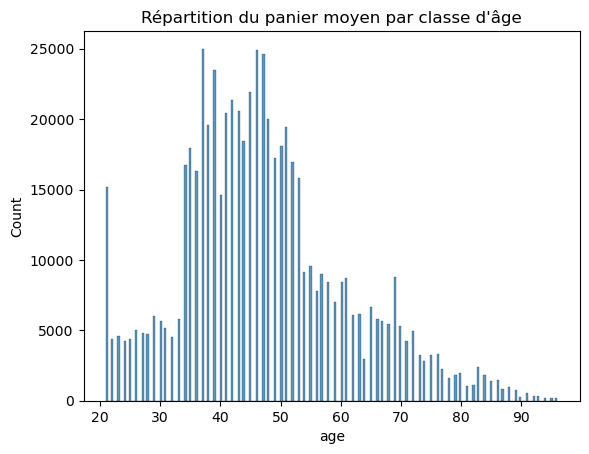

In [504]:
sns.histplot(data=df_part, x='age')
plt.title("Répartition du panier moyen par classe d'âge")
plt.show()

Text(0.5, 1.0, "Points représentent les moyennes d'age")

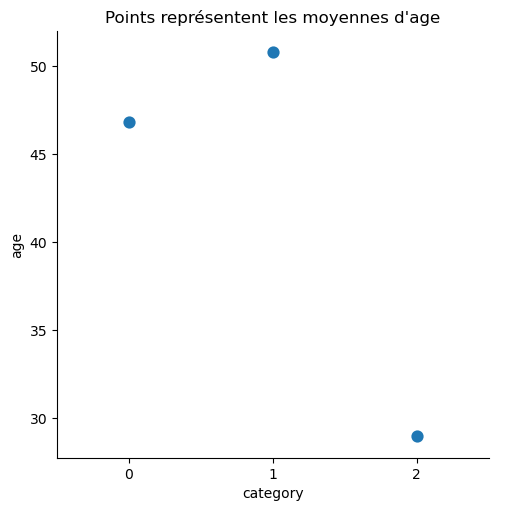

In [508]:
# on observe la moyenne des ages par catégorie
sns.catplot(
    data=df_part, x="category", y="age", kind = "point", join= False)
plt.title("Points représentent les moyennes d'age")

**condition de validité du test :**

1: Les mesures sont indépendantes , oui

2: Les échantillons ont des variances égales, non

3: Les résidus suivent une distribution normale (supposée ou vérifiée), non

4: Au moins 20 individus dans le dispositif, ou normalité des résidus supposée ou vérifiée

les conditions sont ne respectées pour le test paramétrique, nous allons donc procéder aux tests de Kruskal-Wallis (non paramétrique)

In [510]:
corr, pval = stats.kruskal(df_part["age"][df_part["category"] == 0],
df_part["age"][df_part["category"] == 1],
df_part["age"][df_part["category"] == 2])
print("corr:",corr,"pval:", pval)
if pval > alpha:
    print("H0 : Variables indépendantes si p-value > 5%")
else:
    print('H1 : Variables non indépendantes p-value < 5%')

corr: 72209.48289794501 pval: 0.0
H1 : Variables non indépendantes p-value < 5%
